# Analyse de données sur les accidents aux États-Unis

Il y aurait plus 6.3 millions d’accidents chaque année aux États-Unis. Accidents dont résultent des millions de blessés et des dizaines de milliers de morts. L’objectif de ce projet, est de déceler les possibles causes de ces accidents, leurs tendances et d’identifier les villes ou zones les plus à risque afin d’aider à la prévention de futurs cas similaires.

Le jeu de données utilisé pour cette étude provient de Kaggle et contient un ensemble d'informations sur les accidents repertoriés dans 49 des 50 états du pays, sur la période de Février 2016 à Décembre 2021. 

Il sera utilisé en conjonction avec un second jeu de données, repertoriant l'ensemble de la population américaine par ville mis à jour en 2020, obtenu via du scraping de la page Wikipedia. Ce-dernier sera utilisé tout le long de cette étude, afin de déterminer si le taux d'accident est lié à taille de la population.

Sources : 
- https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
- https://smoosavi.org/datasets/us_accidents
- https://axlewise.com/automobile-accident-stats/ <--- Source estimation d’accidents annuel
- https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

Pour l'explication de l'ensemble des abbréviations du Dataset, bien vouloir vous référer à la fin du notebook.

## Imports

In [46]:
import pandas as pd   #annalyse
import numpy as np  #tableaux
import seaborn as sns   #visualiser les donnees
import matplotlib.pyplot as plt  #visualiser les données
import warnings
import folium
from folium.plugins import HeatMap
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## LOADING AND CLEANING DATASET

### US_Accidents

In [47]:
fichier="US_Accidents_Dec21_updated.csv"

df = pd.read_csv(fichier, index_col=0)

In [4]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,
A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

object     32
float64    13
int64       1
dtype: int64


<AxesSubplot:ylabel='None'>

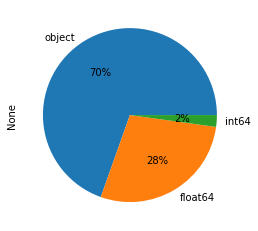

In [26]:
print(df.dtypes.value_counts())
df.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,966290.000000,966290.000000,966290.000000,966290.000000,966290.000000,966290.000000,394267.000000,946233.000000,754422.000000,945327.000000,949181.000000,945471.000000,910647.000000,738071.000000
mean,2.126584,35.871974,-95.189051,35.872139,-95.188755,0.804583,7367.424213,65.736307,63.957267,63.593968,29.526615,9.193716,7.546108,0.008353
std,0.442449,5.381280,17.848433,5.381470,17.848232,1.528995,14209.991151,17.386138,19.868642,22.480456,0.984446,2.574384,5.437773,0.113854
min,2.000000,24.566027,-124.548074,24.566013,-124.545748,0.000000,1.000000,-22.000000,-44.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,32.853507,-117.532170,32.853420,-117.531585,0.108000,1241.000000,55.000000,53.000000,48.000000,29.390000,10.000000,4.600000,0.000000
50%,2.000000,35.688525,-87.764349,35.691065,-87.766121,0.338000,3944.000000,68.000000,68.000000,65.000000,29.850000,10.000000,7.000000,0.000000
75%,2.000000,39.947386,-80.293888,39.947036,-80.293713,0.885000,9080.500000,79.000000,79.000000,82.000000,30.010000,10.000000,10.000000,0.000000
max,4.000000,49.000580,-67.113167,49.075000,-67.109242,151.525000,961051.000000,196.000000,196.000000,100.000000,58.160000,140.000000,822.800000,24.000000


D'après le tableau :

- La grande majorité des accidents a eu une sévérité sensiblement estimée à 2, donc le traffic n'a pas été grandement impacté par les accidents, la majorité du temps.

- La longueur de la route affectée par les accidents est en moyenne de 0.8 miles(Distance(mi)). Il n'y avait donc presque pas de trouble du traffic

- Les accidents ont eu lieu dans des conditons où les chauffeurs avaient en moyenne 9 miles de visibilité(Visibility(mi)). Donc le manque de visibilité ne peut être considéré commme cause des accidents.

- Pour la grande majorité des accidents, aucunes précipitations n'ont été reportées(Precipitation(in)). La pluie n'aurait donc pas été une cause des accidents.

In [ ]:
def reporting(df):
#https://github.com/pandas-profiling/pandas-profiling
#Complete Automated Exploratory Data Analysis
#https://www.datacorner.fr/pandas-profiling/

    from pandas_profiling import ProfileReport
    resultats = df.profile_report(title='Pandas Profiling Report of US Accidents 2016-2021 Rough') #rough = sans nettoyage et gestion des outliers
    resultats.to_file("report.html")
    return None
reporting(df)

In [3]:
df_numeric = df.select_dtypes(exclude='object')
#len(df_numeric.columns)
#print("describe bref des variables numeriques")
#display(df_numeric.describe().round(3).transpose())

In [ ]:
def monanalyse(data):
    e=1e-10
    stat=pd.DataFrame()
    dfnum = data.select_dtypes(include=['float64','int64'])
    stat=dfnum.describe().T
    stat["var"]=dfnum.var()
    stat["erreur_type"]=stat["std"]/np.sqrt(dfnum.shape[0])
    stat["skewness"]=dfnum.skew()-0
    stat["kurtosis"]=dfnum.kurtosis()-3
    stat["taux_dispersion_avec_moyen"]=stat["std"]/stat["mean"]*100
    stat["taux_dispersion_avec_median"]=(stat["75%"]-stat["25%"])/(stat["50%"]+e)*100

    stat["outmax"]=stat["75%"]+1.5*(stat["75%"]-stat["25%"])  #Q3+1.5*IQR
    stat["outmin"]=stat["25%"]-1.5*(stat["75%"]-stat["25%"])  #Q1-1.5*IQR
    
    stat["taux_outliers"]=((dfnum>stat["75%"]+1.5*(stat["75%"]-stat["25%"]))
                       | (dfnum<stat["25%"]-1.5*(stat["75%"]-stat["25%"]))).sum()/dfnum.shape[0]*100
    stat["taux_manquante"]=dfnum.isna().sum()/dfnum.shape[0]*100

    stat["unique"]=dfnum.nunique()#/dfnum.shape[0]*100
    return stat

In [78]:
monanalyse(df)

,count,mean,std,min,25%,50%,75%,max,var,erreur_type,skewness,kurtosis,taux_dispersion_avec_moyen,taux_dispersion_avec_median,outmax,outmin,taux_outliers,taux_manquante,unique
Severity,966290.0,2.126584,0.442449,2.000000,2.000000,2.000000,2.000000,4.000000,0.195761,0.000450,3.530790,8.327558,20.805608,0.000000,2.000000,2.000000,8.398410,0.000000,3
Start_Lat,966290.0,35.871974,5.381280,24.566027,32.853507,35.688525,39.947386,49.000580,28.958173,0.005474,-0.090766,-3.614756,15.001348,19.877199,50.588204,22.212689,0.000000,0.000000,533855
Start_Lng,966290.0,-95.189051,17.848433,-124.548074,-117.532170,-87.764349,-80.293888,-67.113167,318.566543,0.018157,-0.427166,-4.492628,-18.750510,-42.429851,-24.436464,-173.389593,0.000000,0.000000,540703
End_Lat,966290.0,35.872139,5.381470,24.566013,32.853420,35.691065,39.947036,49.075000,28.960216,0.005475,-0.090752,-3.614688,15.001809,19.875047,50.587460,22.212996,0.000000,0.000000,519461
End_Lng,966290.0,-95.188755,17.848232,-124.545748,-117.531585,-87.766121,-80.293713,-67.109242,318.559371,0.018157,-0.427173,-4.492634,-18.750357,-42.428527,-24.436904,-173.388393,0.000000,0.000000,525397
Distance(mi),966290.0,0.804583,1.528995,0.000000,0.108000,0.338000,0.885000,151.525000,2.337825,0.001555,12.902473,581.080328,190.035614,229.881657,2.050500,-1.057500,9.939977,0.000000,10987
Temperature(F),946233.0,65.736307,17.386138,-22.000000,55.000000,68.000000,79.000000,196.000000,302.277796,0.017687,-0.596624,-2.783636,26.448304,35.294118,115.000000,19.000000,0.853574,2.075671,691
Wind_Chill(F),754422.0,63.957267,19.868642,-44.000000,53.000000,68.000000,79.000000,196.000000,394.762951,0.020212,-0.834742,-2.413440,31.065496,38.235294,118.000000,14.000000,1.335106,21.925923,762
Humidity(%),945327.0,63.593968,22.480456,1.000000,48.000000,65.000000,82.000000,100.000000,505.370891,0.022869,-0.351437,-3.695547,35.349981,52.307692,133.000000,-3.000000,0.000000,2.169432,100
Pressure(in),949181.0,29.526615,0.984446,0.020000,29.390000,29.850000,30.010000,58.160000,0.969135,0.001001,-3.562253,18.811437,3.334098,2.077052,30.940000,28.460000,6.624098,1.770586,990


In [81]:
df_object=df.select_dtypes(include='object')
#len(df_object.columns)
print("Describe des variables categorielles ")
display(df_object.describe(include="object").round(3).transpose())

Describe des variables categorielles 


,count,unique,top,freq
End_Time,966290,830992,2017-05-15 15:22:55,58
Description,966289,517624,A crash has occurred causing no to minimum del...,2709
Street,966288,99981,I-95 N,14257
Side,966289,2,R,792141
City,966236,10031,Miami,42544
County,966289,1590,Los Angeles,71761
State,966289,49,CA,244425
Zipcode,965882,188408,33186,2011
Country,966289,1,US,966289
Timezone,965353,4,US/Eastern,455160


#### Nettoyage des données

In [4]:
df.isna().sum().sort_values(ascending = False) 

Number                   572023
Precipitation(in)        228219
Wind_Chill(F)            211868
Wind_Speed(mph)           55643
Weather_Condition         21138
Humidity(%)               20963
Visibility(mi)            20819
Wind_Direction            20582
Temperature(F)            20057
Pressure(in)              17109
Weather_Timestamp         14170
Airport_Code               3329
Nautical_Twilight          1523
Civil_Twilight             1523
Sunrise_Sunset             1523
Astronomical_Twilight      1523
Timezone                    937
Zipcode                     408
City                         54
Street                        2
Country                       1
Turning_Loop                  1
Traffic_Signal                1
Traffic_Calming               1
Stop                          1
Station                       1
Roundabout                    1
Railway                       1
No_Exit                       1
Junction                      1
Give_Way                      1
Crossing

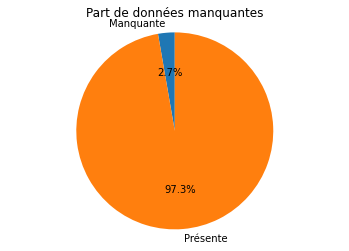

In [5]:
labels = 'Manquante', 'Présente'

fig, ax = plt.subplots()
sizes = df.isnull().sum().sum(), df.notnull().sum().sum()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # s'assurer que le graphe soit un cercle
ax.set_title('Part de données manquantes')

plt.show()

## Nous pouvons constater que nous avons 2.7% de données manquantes dans ce dataset. Regardons plus en détail, quelles sont les colonnes les plus concernées

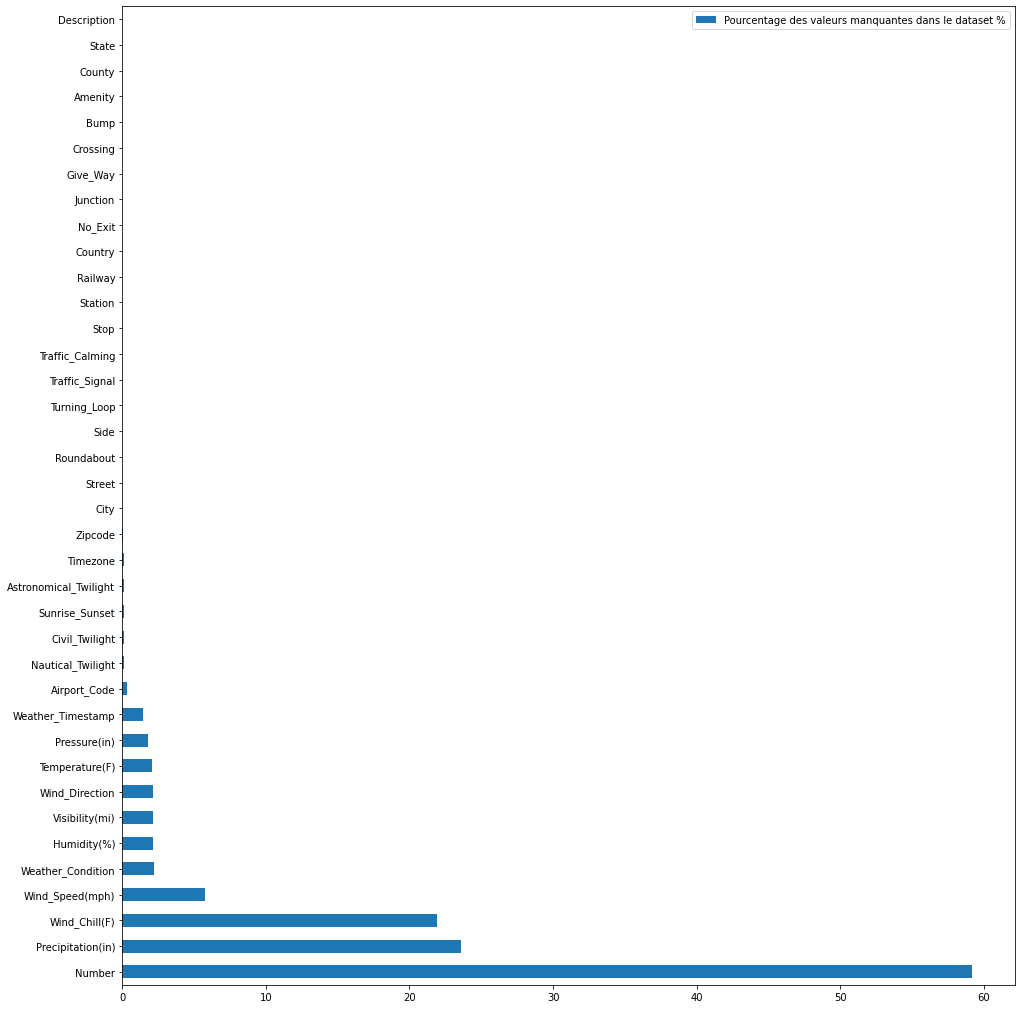

In [13]:
def plot_nas(df: pd.DataFrame):
    "Cette fonction permet de plot le pourcentage des données manquantes par colonne dans un dataset"
    "Source : https://stackoverflow.com/questions/69537383/how-to-plot-count-of-null-values-for-each-column-in-pandas-dataframe"
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Pourcentage des valeurs manquantes dans le dataset %' :na_df})
        plot_width, plot_height = (16,18)
        plt.rcParams['figure.figsize'] = (plot_width,plot_height)
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

Plus de 5000 données manquantes dans Number, soit près de 60% de données manquantes. Étant donné que 60% des données sur les numéros de rues sont manquantes, il serait donc plus judicieux de drop cette colonne de la table pour la suite des analyses

Precipitation(in) et Wind_Chill(F) ont respectivement ~22 et ~24% de données manquantes. 

Compte tenu de l'importance que pourrait avoir les informations transmises dans le cadre de l'étude des accidents, plutôt que de remplacer par des modes ou moyennes, toutes les valeurs manquantes, nous avons décidé de tout simplement les supprimer. Ceci pour ne pas risquer de fausser nos analyses et calculs à venir.

In [48]:
df = df.drop("Number",axis=1) #suppression de la colonne Number

In [67]:
df = df.dropna() #suppression de toutes les valeurs manquantes du dataset

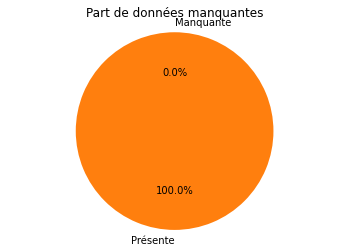

In [5]:
labels = 'Manquante', 'Présente'

fig, ax = plt.subplots()
sizes = df.isnull().sum().sum(), df.notnull().sum().sum()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # s'assurer que le graphe soit un cercle
ax.set_title('Part de données manquantes')

plt.show() #voyons s'il reste des valeurs manquantes

Voyons s'il y a des outliers dans le dataset (ils sont gérés plus en détail dans la partie détection d'anomalies avec Isolation Forest)

<AxesSubplot:>

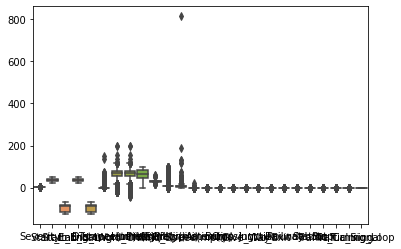

In [8]:
sns.boxplot(data=df) 

In [ ]:
#Suppression des outliers
#from scipy import stats
#z_scores = stats.zscore(df) #calculate z-scores of `df`
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#df = df[filtered_entries]  

### Loading US_pop 
US_pop est un fichier repertoriant l'ensemble de la population américaine par ville mis à jour en 2020, obtenu via du scraping de la page Wikipedia : https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population.

Ce fichier sera utilisé tout le long de cette étude, afin de déterminer si le taux d'accident est lié à taille de la population.


In [6]:
df2 = pd.read_csv('US_pop_2021.csv', index_col=0)
df2

,State,Population
City,,
New York,NY,8804190
Los Angeles,CA,3898747
Chicago,IL,2746388
Houston,TX,2304580
Phoenix,AZ,1608139
...,...,...
Hoot Owl,OK,0
Lakeside,MO,0
Mustang,TX,0


## EDA AND VISUALISATION


### Analyse de City et State

In [21]:
cities = df.City.unique()
#len(cities) il y a 10032 villes dans le dataset
#Quelles sont les villes avec le plus d'accidents repertoriés?
cities_accident_count = df.City.value_counts()
cities_accident_count[:10]

Miami          42544
Orlando        23565
Los Angeles    21345
Dallas         16745
Houston        15917
Charlotte      13766
Sacramento      9678
San Diego       9232
Raleigh         8356
Nashville       7664
Name: City, dtype: int64

In [63]:
state = df.State.unique()
state

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA', nan], dtype=object)

In [66]:
#Here I was trying to merge city with state but it didn't work as expected
#cities_and_states = np.concatenate((cities, state))
#cities_and_states

<AxesSubplot:>

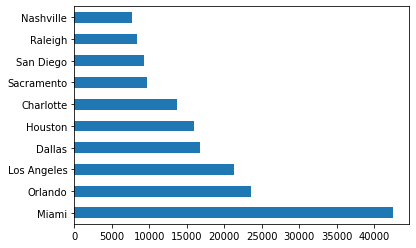

In [68]:
cities_accident_count[:10].plot(kind='barh')

Ici, nous pouvons observer les 10 villes les plus touchées par les accidents dans le pays d'après les données en présence dans notre dataset. 
- 6 d'entre elles ont repertorié plus de 10.000 accidents et parmi elles, 3 en ont repertorié plus de 20.000 (Los Angeles, Orlando, Miami).
- Les 4 autres villes du top 10 ont noté entre 5.000 et 10.000 accidents.

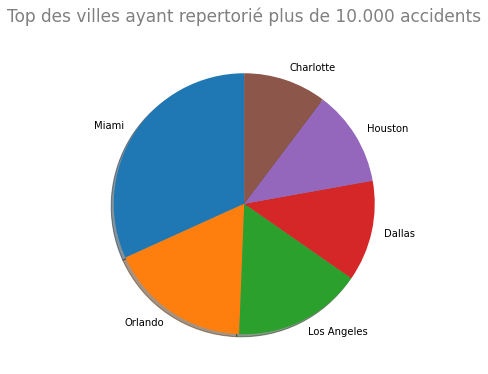

In [22]:
#Comme il ya 10032 villes uniques, il est impossible de plot les données pour toutes.
#Ici, je plot les villes ayant repertorié plus de 10k accidents.
a = df.City.value_counts()
plt.figure(figsize=(10,6))
plt.title("Top des villes ayant repertorié plus de 10.000 accidents",size=17,color="grey",y=1.04)
#t = a[a>10000].plot(kind="pie",shadow=True,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),startangle=130,autopct="%1.1f%%",label="")
lab= a[a>10000].index
plt.pie(a[a>10000],shadow=True,explode=None,startangle=90,labels=lab)
plt.show()

Avec ce schéma, nous pouvons mieux observer les villes les plus accidentées du dataset. Nous pouvons ainsi constater que:
- Miami est de loin la ville la plus accidentée suivie par Orlando et Los Angeles. Comment cela s'expliquerait-t-il, sachant que la population de Los Angeles est la deuxième plus grande de tout le pays ? 

In [67]:
#Calculon la moyenne d'accident repertorié par année dans la ville la plus accidentée
largest_acc_city = a[0]
largest_acc_city/6 #on divise par 6 parce qu'on est sur la periode 2016-2021

7090.666666666667

 D'après ce calcul, 7090 accidents annuels sont repertoriés à Miami

In [29]:
#Comparons ces résultats à la population des 20 villes les plus peuplées
df2.groupby("City")["Population"].sum().sort_values(ascending=False).head(20)

City
New York         8804190
Los Angeles      3898747
Chicago          2746388
Houston          2315124
Phoenix          1616548
Philadelphia     1612620
San Antonio      1435922
San Diego        1390680
Dallas           1344344
Columbus         1232335
Jacksonville     1101675
San Jose         1013719
Austin            996035
Fort Worth        918915
Washington        895677
Charlotte         891696
Indianapolis      887642
San Francisco     873965
Portland          775347
Seattle           737015
Name: Population, dtype: int64

Nous pouvons constater que dans le classement des 6 villes les plus touchées par les accidents :
- 4 des villes les plus peuplées y figurent (Los Angeles, Dallas, Houston, Charlotte).
- Le nombre d'accident semblerait être lié au nombre d'habitants, des études sont à faire.

In [64]:
#Regardons la population de Miami
print(df2.loc["Miami"]) 

      State  Population
City                   
Miami    FL      442241
Miami    OK       12969
Miami    AZ        1541
Miami    TX         539
Miami    MO         152


Il semble que plusieurs villes (5) existent au nom de Miami dans 5 états différents.
Les accidents repertoriés pour Miami concerneraient alors les 5 villes et le résultat total des accidents serait en
fait, l'addition des accidents repertoriés dans les 5 villes.
Qu'en est-t-il de la population d'Orlando?

In [66]:
#Regardons la population d'Orlando
print(df2.loc["Orlando"])

        State  Population
City                     
Orlando    FL      307573
Orlando    OK         130


Même constat, il existe plus d'une ville (deux) au nom d'Orlando. Une dans l'état de Floride et l'autre dans l'état d'Oklahoma. Les résultats concernant les accidents seraient ici aussi partagés entre ces deux villes.

Nous remarquons donc que sur les 6 villes les plus accidentées:
- 4 sont des villes uniques et font partie des 20 villes les plus peuplées du pays.
- Tandis que les 2 dernières font parties du classement car plusieurs villes portent le même nom et leurs résultats ont été additionnés. 
- À Miami (total des 5 villes) 7090 accidents en moyenne ont été repertoriés par an sur la période de 2016-2021  

Nous pouvons donc penser à travers ces résultats que le taux d'accident semble lié à la taille de la population.
Cependant, il est étrange que New York, la ville la plus peuplée, n'ait pas repertorié plus de 10k accidents sur la période étudiée

In [69]:
#Parmi les 100 villes ayant repertorie le plus d'accident
#Quels sont les etats les plus touches ?
high_accident_cities = cities_accident_count[cities_accident_count >=1000]
low_accident_cities = cities_accident_count[cities_accident_count <1000]

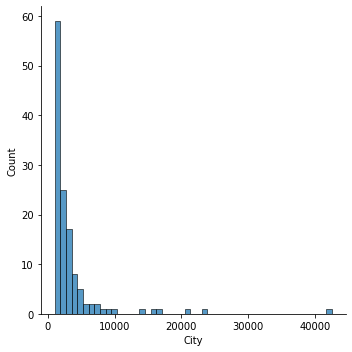

In [84]:
len(high_accident_cities)/ len(cities_accident_count) 
#Sur 10032 villes, 129 ont plus de 1000 accidents. Cela représente moins de 2% des villes
sns.displot(high_accident_cities)

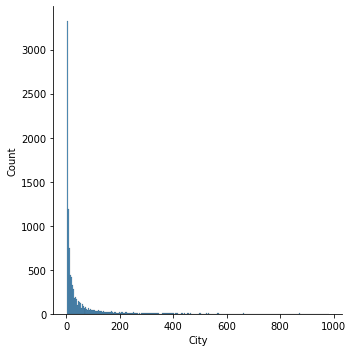

In [85]:
len(low_accident_cities)/ len(cities_accident_count)
#Sur 10032 villes, 9902 ont plus de 1000 accidents. Cela représente plus de 98% des villes
sns.displot(low_accident_cities)

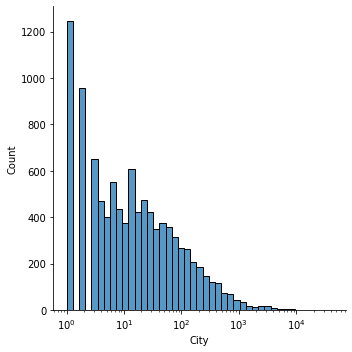

In [86]:
#Regardons la distribution des accidents dans les villes
sns.displot(cities_accident_count, log_scale = True)

On peut constater que le nombre d'accident par ville décroit de manière exponentielle

In [87]:
cities_accident_count[cities_accident_count==1]

Mcgregor          1
Stephenville      1
Richland Hills    1
Vanleer           1
Arthur            1
                 ..
Nodaway           1
Griswold          1
Camdenton         1
Hillrose          1
Michigan          1
Name: City, Length: 1246, dtype: int64

1246 villes ont repertorié seulement 1 accident

In [23]:
cities_under11_accidents = cities_accident_count[cities_accident_count<=10] 
cities_under11_accidents

Womelsdorf    10
Filer         10
Feura Bush    10
Jonesburg     10
Mahnomen      10
              ..
Nodaway        1
Griswold       1
Camdenton      1
Hillrose       1
Michigan       1
Name: City, Length: 4913, dtype: int64

4913 villes ont repertorié entre 1 et 10 accidents, pourquoi ?
Est-ce un manque de donnees ? Ou des elements autres qui le justifient (meteo, localisation, etc)?

### Analyse détaillée sur State 
Ici il s'agit d'étudier les accidents repertoriés par état pour voir si cela nous donne une idée des états les plus succeptibles aux accidents.

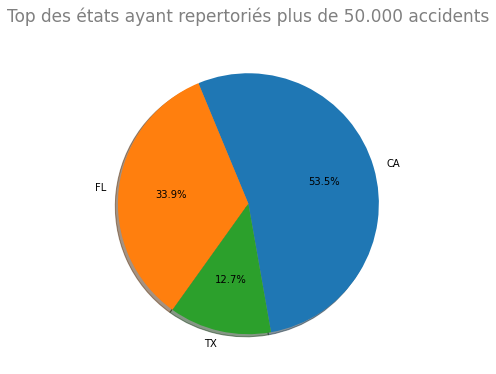

In [52]:
#Observons les etats les plus touchés par les accidents
b = df.State.value_counts()
plt.figure(figsize=(10,6))
plt.title("Top des états ayant repertoriés plus de 50.000 accidents",size=17,y=1.04,color="grey")
high_accident_states= b[b>50000].index
plt.pie(b[b>50000],shadow=True,explode=None,autopct='%1.1f%%',startangle=280,labels=high_accident_states)
plt.show()

On constate que les 3 états les plus accidentés(plus de 50.000 accidents) sont la Californie, la Floride 
et le Texas. Cela représente ~6% des états présents dans le dataset.
Autrement dit, ~6% des états ont reportés plus de 50.000 accidents, la Californie étant l'état le plus touché.
Nous devrons donc nous concentrer sur ces états afin de mieux comprendre les raisons d'un nombre d'accidents si élevé.

In [72]:
#Regardons le top 10 des etats les plus peuplés pour voir s'il y a un rapport entre les deux
df2.groupby("State")["Population"].sum().sort_values(ascending=False).head(10)

State
CA    33000955
TX    21096801
NY    13011280
IL    11170271
FL    10832913
NJ     9288994
OH     7666914
MI     7270059
MA     7029917
NC     6017700
Name: Population, dtype: int64

Effectivement, les 3 états les plus accidentés, figurent dans le top 5 des etats les plus peuples avec respectivement:
- La Californie à la première place (1er état le plus accidenté)
- Le Texas à la deuxième (3e état le plus accidenté)
- La Floride à la cinquième (5e état le plus accidenté)

Mais pourquoi la Floride rescence plus d'accidents que le Texas qui a pourtant plus d'habitants ?

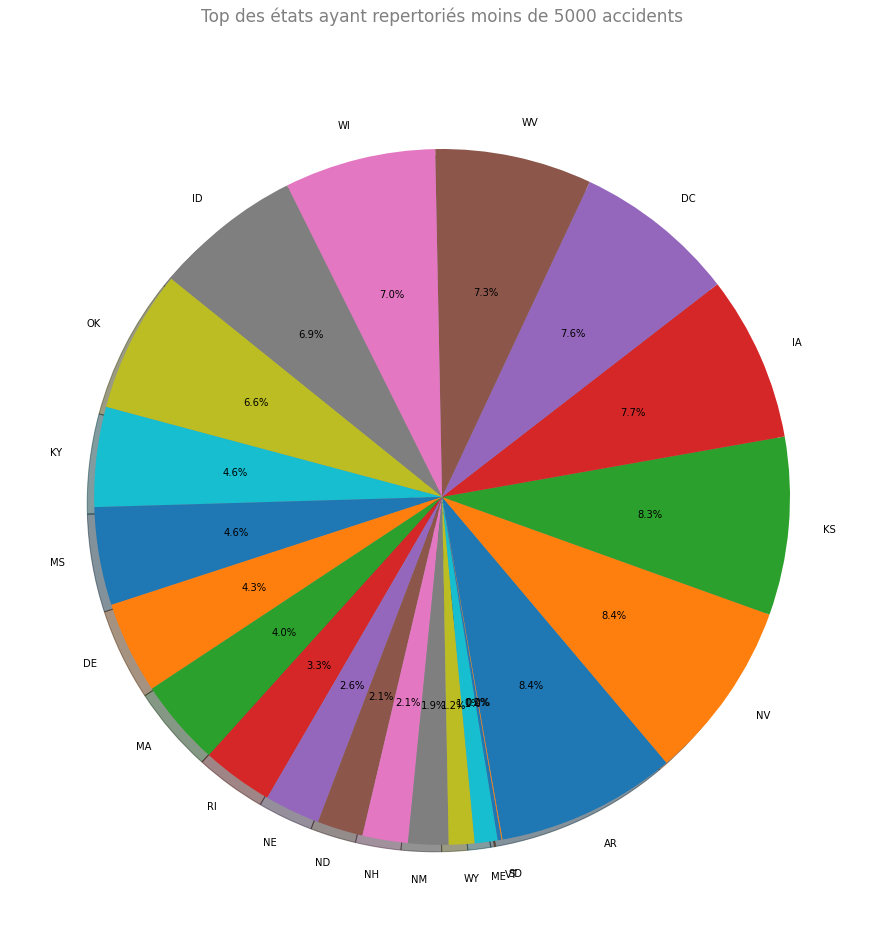

In [53]:
#Observons les etats les moins touchés par les accidents
b = df.State.value_counts()
plt.figure(figsize=(16,16))
plt.title("Top des états ayant repertoriés moins de 5000 accidents",size=17,y=1.04,color="grey")
low_accident_states= b[b<5000].index
plt.pie(b[b<5000],shadow=True,explode=None,autopct='%1.1f%%',startangle=280,labels=low_accident_states)
plt.show()

Ici, on constate que 21 états ont reportés moins de 5000 accidents. Cela représente ~42% des états présents dans le dataset(49). Autrement dit, ~42% des états ont reportés moins de 5000 accidents.

Cependant, il reste à noter que plusieurs villes ont reportés entre 1 et 10 accidents ce qui pourrait affecter ce résultat.

En additionnant ce pourcentage aux 6% que représentent les 3 états les plus accidentés, il nous reste donc ~51% des états du dataset ayant reporté entre 5000 et 50000 accidents.

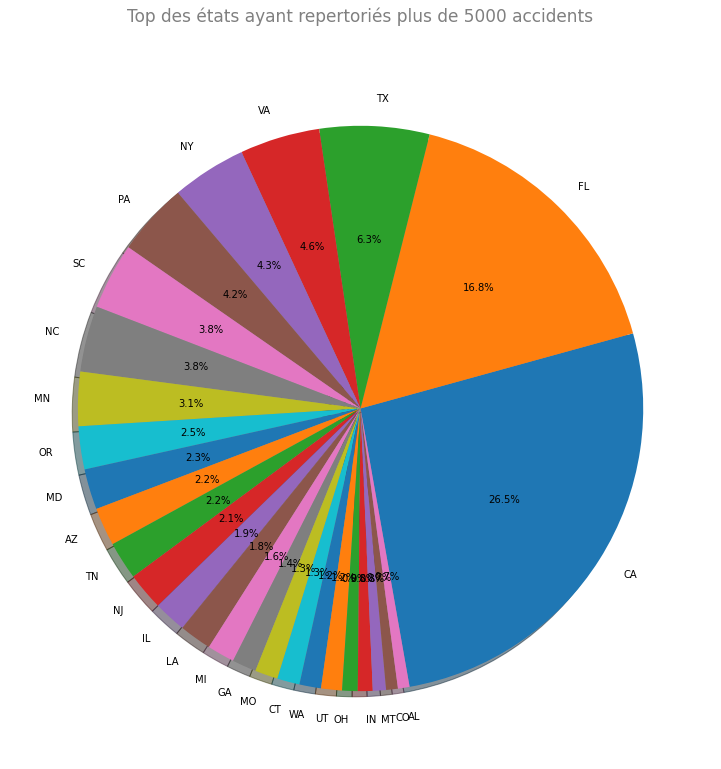

In [51]:
#Observons les etats ayant repertoriés plus de 5000 accidents
b = df.State.value_counts()
plt.figure(figsize=(13,13))
plt.title("Top des états ayant repertoriés plus de 5000 accidents",size=17,y=1.04,color="grey")
midhigh_accident_states = b[b>5000].index
plt.pie(b[b>5000],shadow=True,explode=None,autopct='%1.1f%%', startangle=280,labels=midhigh_accident_states)
plt.show()

### Analyse de Street

#### Quelles sont les rues les plus accidentées ?

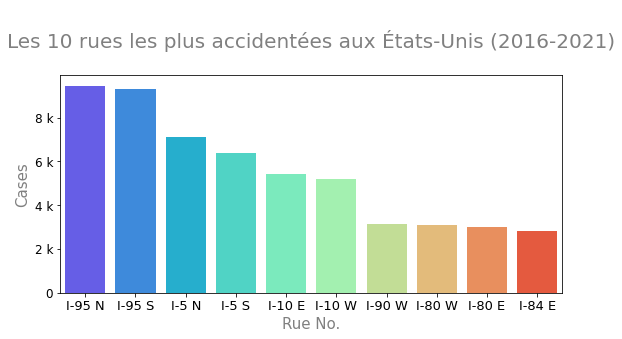

In [42]:
street = pd.DataFrame(df.Street.value_counts().reset_index().rename(columns={'index':'Rue No.', 'Street':'Cases'}))
top_street = pd.DataFrame(street.head(10))
plt.figure(figsize=(9,4))
plt.title('\nLes 10 rues les plus accidentées aux États-Unis (2016-2021)\n', size=20, color='grey')
plt.xlabel('\nRue No.\n', fontsize=15, color='grey')
plt.ylabel('\nAccidents reportés\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=top_street["Rue No."],y=top_street.Cases,palette="rainbow")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [75]:
len(df.Street)

966290

In [76]:
for (i,j) in zip(street["Street No."],range(0,10)):
    print("Le pourcentage d'accidents reportés sur la rue: {} est {:.2f}%".format(i,(street.Cases[j]/len(street.Cases)*100)))

Le pourcentage d'accidents reportés sur la rue: I-95 N est 14.26%
Le pourcentage d'accidents reportés sur la rue: I-95 S est 12.93%
Le pourcentage d'accidents reportés sur la rue: I-5 N est 10.88%
Le pourcentage d'accidents reportés sur la rue: I-10 E est 8.41%
Le pourcentage d'accidents reportés sur la rue: I-10 W est 8.17%
Le pourcentage d'accidents reportés sur la rue: I-5 S est 7.76%
Le pourcentage d'accidents reportés sur la rue: I-80 W est 5.52%
Le pourcentage d'accidents reportés sur la rue: I-80 E est 4.91%
Le pourcentage d'accidents reportés sur la rue: I-405 N est 4.51%
Le pourcentage d'accidents reportés sur la rue: I-75 S est 4.43%


Sur la période de 2016-2021, la rue I-95 N a été celle qui a reporté le plus d'accidents dans le pays (14k).

### Analyse de Start_Time

In [98]:
df.Start_Time 
#pour pouvoir étudier les series temporelles, il fallait convertir Start_Time en objet pandas datetime

ID
A-1         2016-02-08 00:37:08
A-2         2016-02-08 05:56:20
A-3         2016-02-08 06:15:39
A-4         2016-02-08 06:51:45
A-5         2016-02-08 07:53:43
                   ...         
A-966286    2021-09-20 17:00:00
A-966287    2021-08-29 14:45:07
A-966288    2021-12-02 14:24:30
A-966289    2021-03-06 10:08:21
A-966290    2021-09-15 17:22:55
Name: Start_Time, Length: 966290, dtype: object

In [50]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df.Start_Time = pd.to_datetime(df.Start_Time)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

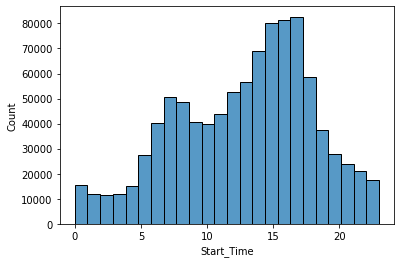

In [105]:
#A quelle periode de la journee les accidents sont-ils plus frequents ?

#On va recuperer les heures de mon df : https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html

sns.histplot(df.Start_Time.dt.hour, bins = 24) #norm_hist=True est censé afficher les pourcentages mais ne marche pas

In [13]:
hour = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={"index":"Hour","Start_Time":"Accident_Cases"})
for (i,j) in zip(hour.Hour,range(0,24)):
  print("Le pourcentage d'accidents prenant place à {} heure est de {:.2f}%".format(i,(hour.Accident_Cases[j]/hour.Accident_Cases.sum())*100))

Le pourcentage d'accidents prenant place à 17 heure est de 8.55%
Le pourcentage d'accidents prenant place à 16 heure est de 8.41%
Le pourcentage d'accidents prenant place à 15 heure est de 8.31%
Le pourcentage d'accidents prenant place à 14 heure est de 7.15%
Le pourcentage d'accidents prenant place à 18 heure est de 6.05%
Le pourcentage d'accidents prenant place à 13 heure est de 5.87%
Le pourcentage d'accidents prenant place à 12 heure est de 5.47%
Le pourcentage d'accidents prenant place à 7 heure est de 5.24%
Le pourcentage d'accidents prenant place à 8 heure est de 5.04%
Le pourcentage d'accidents prenant place à 11 heure est de 4.55%
Le pourcentage d'accidents prenant place à 9 heure est de 4.22%
Le pourcentage d'accidents prenant place à 6 heure est de 4.15%
Le pourcentage d'accidents prenant place à 10 heure est de 4.14%
Le pourcentage d'accidents prenant place à 19 heure est de 3.87%
Le pourcentage d'accidents prenant place à 20 heure est de 2.91%
Le pourcentage d'accidents pr

D'après le graphique, on remarque que la grande majorité des accidents prend place durant la journée (entre 6 et 18h).
On peut constater deux moments dans la journée où le nombre d'accident croit considérablement:
- Le premier moment prend place entre 6h et 9h.
- Le deuxième quand à lui, prend place entre 15 et 18h (où le pourcentage d'accident est le plus élevé).

Ces moments correspondent étroitement aux heures où les habitants vont et rentrent pressément du travail de manière générale.
Les accidents semblent donc prendre place le plus souvent lorsque le traffic serait saturé. 
On constate également une forte baisse du nombre d'accidents entre 19h et 4h du matin, période durant laquelle les
routes seraient plus dégagées peut-être dû au retour chez eux de la majorité des habitants.

Pourrait être intéressant de regarder le graph de traffic et de le comparer à accident start et voir les accidents par unité de traffic et voir si ce numéro et supérieur 
Autrement dit, regarder quand est-ce que les accidents par unite de traffic est le plus grand.
Peut être chercher un dataset repertoriant heure par heure les informations de traffic. 

#### Quels sont les jours de la semaine durant lesquels il y a le plus d'accidents ?

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

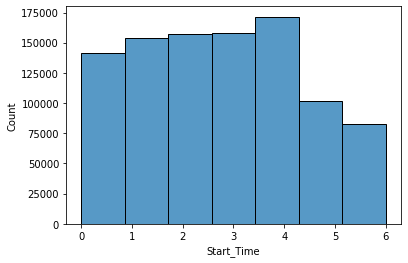

In [106]:
sns.histplot(df.Start_Time.dt.dayofweek, bins = 7) #norm_hist=True est cense afficher les pourcentages mais marche pas

In [15]:
day = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})
for (i,j) in zip(day.Day,range(0,7)):
  print("Le pourcentage d'accidents prenant place le {} est {:.2f}%".format(i,(day.Cases[j]/day.Cases.sum())*100))

Le pourcentage d'accidents prenant place le Friday est 17.74%
Le pourcentage d'accidents prenant place le Thursday est 16.37%
Le pourcentage d'accidents prenant place le Wednesday est 16.28%
Le pourcentage d'accidents prenant place le Tuesday est 15.90%
Le pourcentage d'accidents prenant place le Monday est 14.65%
Le pourcentage d'accidents prenant place le Saturday est 10.50%
Le pourcentage d'accidents prenant place le Sunday est 8.56%


Ici, on constate que accidents se produisent le plus souvent durant les jours ouvrables (de lundi à vendredi) :
- Les accidents semblent plus ou moins repartis de manière équilibrée sur cette période, avec une hausse du nombre d'accident le vendredi.
- De plus, d'après le graphique, les accidents se produisent beaucoup moins durant les week-ends (le nombre d'accident y est le plus bas).

#### Est-ce que la distribution par heure des accidents est la même durant les jours ouvrables et le week-end ?

Distribution Horaire des accidents des dimanches


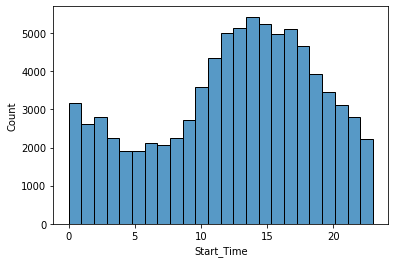

In [128]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, bins = 24)
print('Distribution Horaire des accidents des dimanches')

Distribution Horaire des accidents des samedis


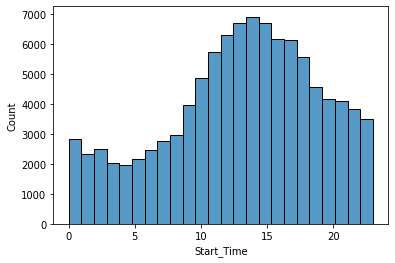

In [122]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, bins = 24)
print('Distribution Horaire des accidents des samedis')

Distribution Horaire des accidents des lundis


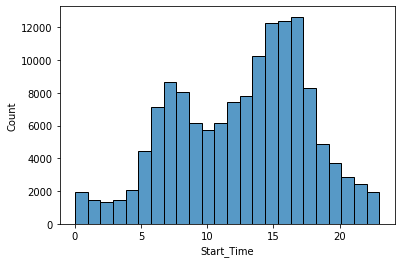

In [121]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
tuesdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 1]
wednesdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
thursdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 3]
fridays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
sns.histplot(mondays_start_time.dt.hour, bins = 24)
print('Distribution Horaire des accidents des lundis')

Distribution Horaire des accidents des mardis


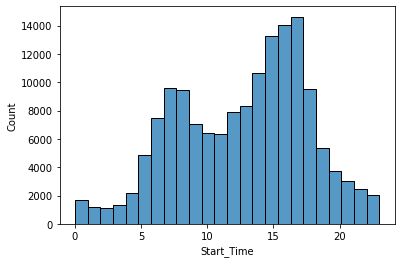

In [120]:
sns.histplot(tuesdays_start_time.dt.hour, bins = 24)
print('Distribution Horaire des accidents des mardis')

Distribution Horaire des accidents des mercredis


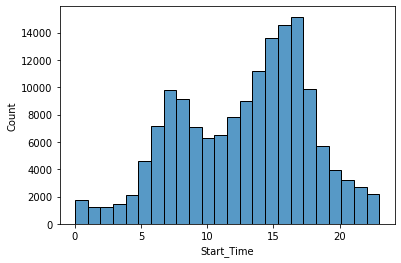

In [125]:
sns.histplot(wednesdays_start_time.dt.hour, bins = 24)
print('Distribution Horaire des accidents des mercredis')

Distribution Horaire des accidents des jeudis


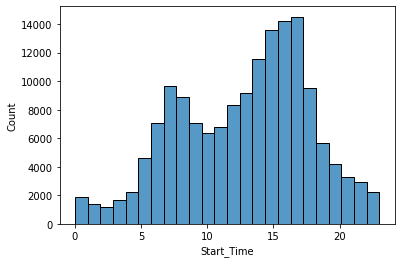

In [126]:
sns.histplot(thursdays_start_time.dt.hour, bins = 24)
print('Distribution Horaire des accidents des jeudis')

Distribution Horaire des accidents des vendredis


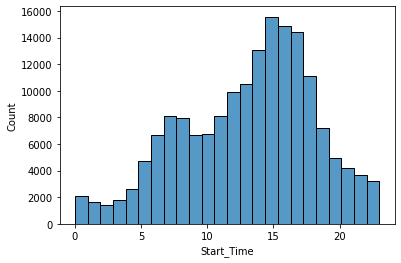

In [127]:
sns.histplot(fridays_start_time.dt.hour, bins = 24)
print('Distribution Horaire des accidents des vendredis')

D'après les différents graphiques effectués, la distribution par heure des accidents le week-end, est differente de
celle des jours ouvrables :
- Le week-end, les accidents prennent place le plus souvent entre 10h et 20h ainsi qu'entre minuit et 3h.
- Contrairement aux jours ouvrables où, les accident se produisent le plus entre 5h et 9h et aussi entre 14h et 18h.

#### Quels sont les mois ayant le plus d'accidents ?

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

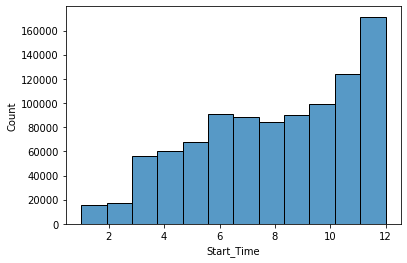

In [129]:
sns.histplot(df.Start_Time.dt.month, bins = 12)

D'après le graphique, Octobre, Novembre, Décembre sont les mois ayant le plus d'accidents repertoriés, avec le pic d'accident ayant lieu durant le mois de Décembre. Ce-dernier s'annonce alors comme le mois le plus dangereux de l'année.

Ces mois correspondant à la période d'Automne-Hiver, serait-ce à cause de la baisse des températures que les accidents augmentent ?

Il est également à rappeler que les données repertoriées dans ce dataset sont mises en place sur la période de février 2016 à décembre 2021, il manque donc les informations concernant les accidents ayant eu lieu en janvier 2016. Cela pourrait jouer sur le graphique.

#### Essayons de voir les données sur les accidents par années

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

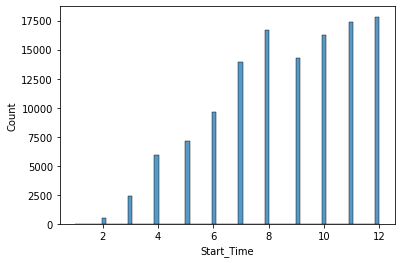

In [148]:
df_year = df[df.Start_Time.dt.year==2016]
sns.histplot(df_year.Start_Time.dt.month)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

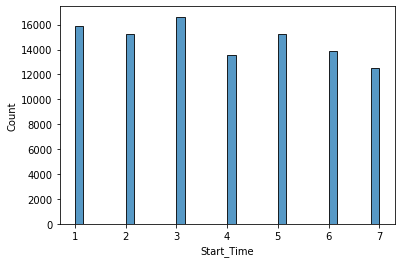

In [149]:
df_year = df[df.Start_Time.dt.year==2017]
sns.histplot(df_year.Start_Time.dt.month)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

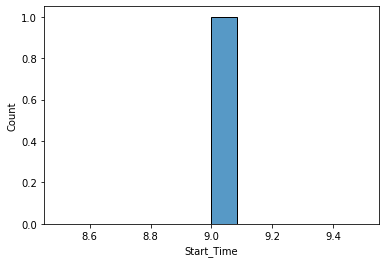

In [151]:
df_year = df[df.Start_Time.dt.year==2018]
sns.histplot(df_year.Start_Time.dt.month, bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

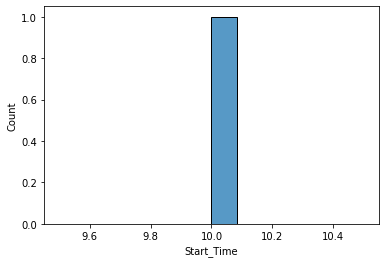

In [143]:
df_year = df[df.Start_Time.dt.year==2019]
sns.histplot(df_year.Start_Time.dt.month, bins = 12)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

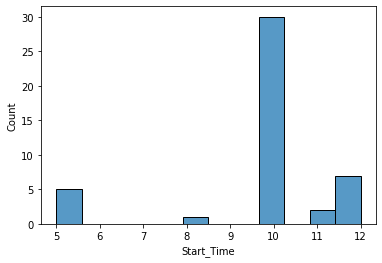

In [144]:
df_year = df[df.Start_Time.dt.year==2020]
sns.histplot(df_year.Start_Time.dt.month, bins = 12)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

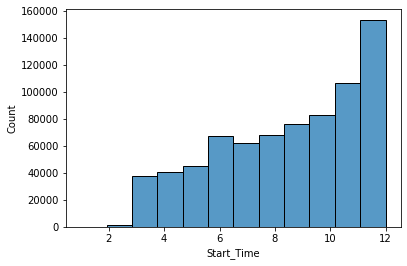

In [145]:
df_year = df[df.Start_Time.dt.year==2021]
sns.histplot(df_year.Start_Time.dt.month, bins = 12)

Il semblerait que peu de données aient été repertoriées sur les 5 derniers mois de 2017 et très peu l'ont été sur les années 2018, 2019, 2020. 

Tandis que les données les plus repertoriées ont été sur les années 2016 et 2021, sur la deuxième moitié de l'année. Ce qui expliquerait qu'il y ait plus de données sur les accidents de la deuxième moitié de l'année.


#### Quelle est la tendance des accidents au fil des ans ? Croissante ? Decroissante ?

In [51]:
year = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"Année","Start_Time":"Accidents_Repertoriés"})

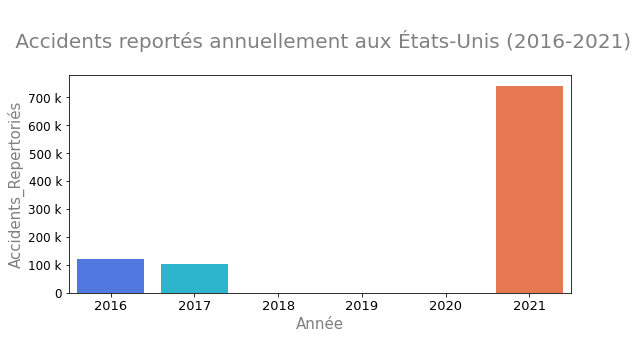

In [52]:
plt.figure(figsize=(9,4))
plt.title('\n Accidents reportés annuellement aux États-Unis (2016-2021)\n', size=20, color='grey')
plt.xlabel('\n Année \n', fontsize=15, color='grey')
plt.ylabel('\n Nombre repertorié \n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=year.Année, y = year.Accidents_Repertoriés,palette="rainbow")
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

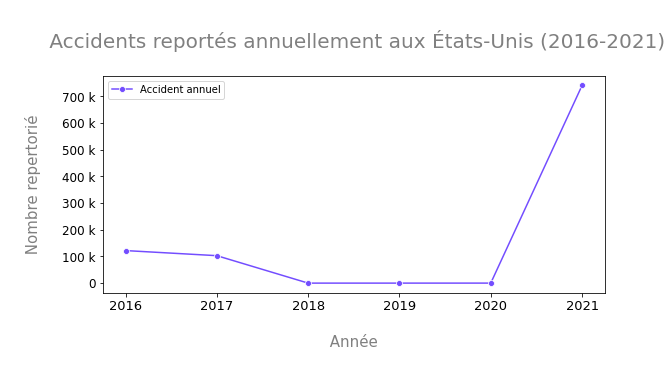

In [53]:
plt.figure(figsize=(9,4))
plt.title('\n Accidents reportés annuellement aux États-Unis (2016-2021)\n', size=20, color='grey')
plt.xlabel('\n Année \n', fontsize=15, color='grey')
plt.ylabel('\n Nombre repertorié \n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.lineplot(data = year, marker='o', x='Année', y='Accidents_Repertoriés', color = '#734dff', label='Accident annuel')
a.xaxis.set_ticks(year.Année)
a.yaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

Malgré l'absence considérable de données sur les années 2018, 19, 20, la tendance des accidents repertoriés semble croissante. Peut-être la collecte de données sur les accidents aurait été plus efficace au fil des ans et/ou il y aurait eu plus d'accidents. (Nous ne sommes pas encore en mesure d'y répondre)

In [18]:
for (i,j) in zip(year.Année,range(0,5)):
  print("La moyenne d'accidents repertoriés par mois dans l'année {} est de {}.".format(i,round(year.Accidents_Repertoriés[j]/12)))

La moyenne d'accidents repertoriés par mois dans l'année 2021 est de 61775.
La moyenne d'accidents repertoriés par mois dans l'année 2016 est de 10169.
La moyenne d'accidents repertoriés par mois dans l'année 2017 est de 8577.
La moyenne d'accidents repertoriés par mois dans l'année 2020 est de 4.
La moyenne d'accidents repertoriés par mois dans l'année 2018 est de 0.


In [19]:
for (i,j) in zip(year.Année,range(0,5)):
  print("La moyenne d'accidents repertoriés par jour dans l'année {} est de {}.".format(i,round(year.Accidents_Repertoriés[j]/365)))

La moyenne d'accidents repertoriés par jour dans l'année 2021 est de 2031.
La moyenne d'accidents repertoriés par jour dans l'année 2016 est de 334.
La moyenne d'accidents repertoriés par jour dans l'année 2017 est de 282.
La moyenne d'accidents repertoriés par jour dans l'année 2020 est de 0.
La moyenne d'accidents repertoriés par jour dans l'année 2018 est de 0.


Compte tenu du manque d'informations sur les années 2018,19,20, continuer d'étudier les accidents de ces année ne semble pas pertinent 

### Étude des conditions  routières
Ici il s'agit d'étudier l'impact de l'état des routes sur les accidents en calculant le pourcentage d'accident reporté pour chaque condition routière.

#### Est-ce que la condition des routes a influé sur les accidents?

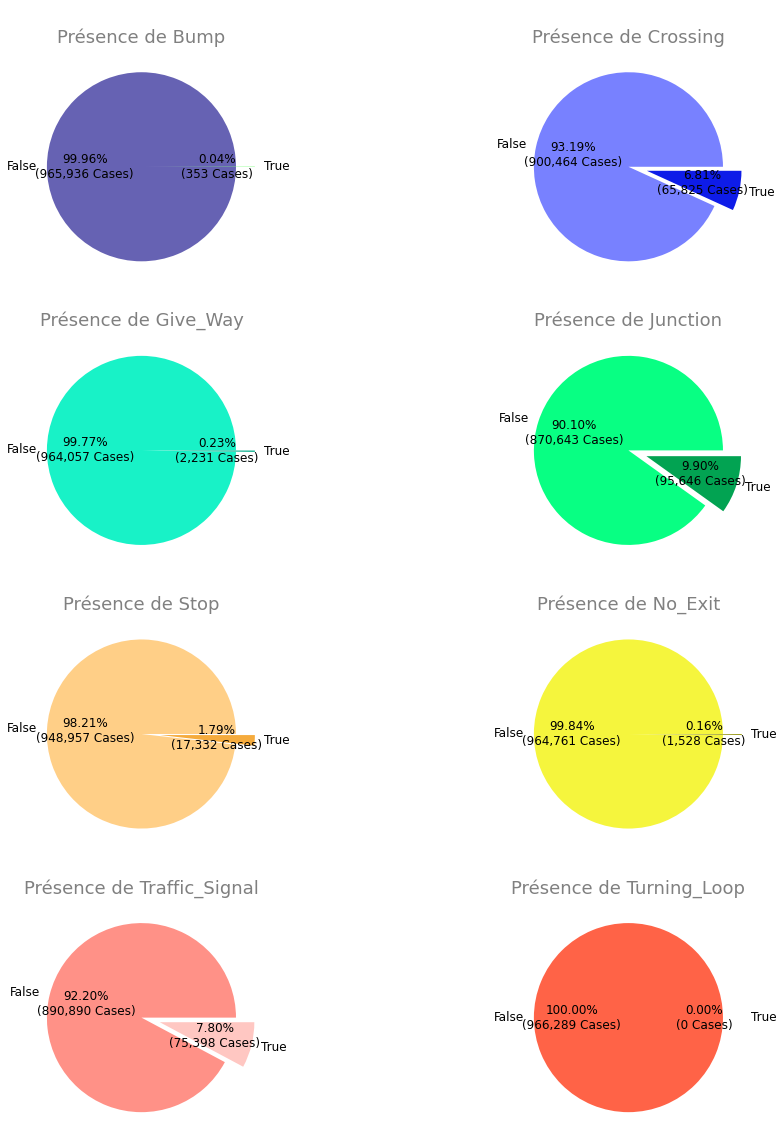

In [103]:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]    
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    
    
    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPrésence de {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')
    
    count += 1
    

D'après les figures ci-dessus, voici ce que l'on observe : 
- Quasiment 100% des accidents reportés ont eu lieu sur des routes n'ayant pas de bosses.
- 6.81% des accidents reportés ont eu lieu à un croisement.
- Quasiment 100% des accidents reportés ont eu lieu sur des routes n'ayant pas de panneau ‘cédez le passage’.
- 9.90% des accidents reportés ont eu lieu à une intersection.
- 1.79% des accidents reportés ont eu lieu sur des routes ayant un panneau 'stop'.
- 0.16% des accidents reportés ont eu lieu sur des routes sans issue.
- 7.80% des accidents reportés ont eu lieu en présence de signalisation routière.
- Aucun accident n'a été reporté sur les ronds points.

### Étude météorologique
Ici il s'agit d'étudier l'impact des conditions  météo sur les accidents reportés.

#### Étude des températures

In [54]:
temp = pd.DataFrame(df["Temperature(F)"].value_counts()).reset_index().rename(columns={"index":"Temp","Temperature(F)":"Cases"})

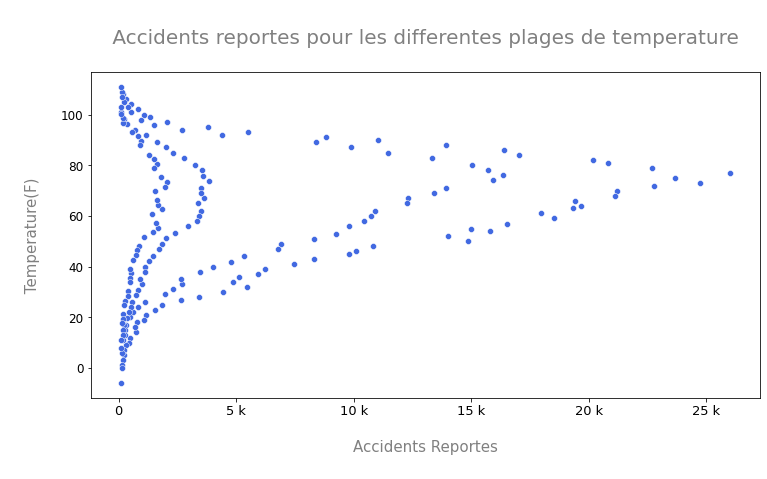

In [55]:
plt.figure(figsize=(12,6))
plt.title('\n Accidents reportes pour les differentes plages de temperature \n', size=20, color='grey')
plt.ylabel('\n Temperature(F) \n', fontsize=15, color='grey')
plt.xlabel('\nAccidents Reportes\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=temp.Cases[temp.Cases>100],y=temp.Temp,color="royalblue")
a.xaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

D'après ce graph, le maximum d'accident reporté a eu lieu lorsque la température était entre 60 et 80F soit, entre ~15C et 26C. La température n'a donc pas influé sur les accidents.

#### Étude de l'humidité
L'humidité relative de l'air, ou degré hygrométrique, couramment notée φ, correspond au rapport de la pression partielle de la vapeur d'eau contenue dans l'air sur la pression de vapeur saturante (ou tension de vapeur) à la même température.
Source : https://fr.wikipedia.org/wiki/Humidité_relative

In [56]:
humid = pd.DataFrame(df["Humidity(%)"].value_counts()).reset_index().rename(columns={"index":"Humidity","Humidity(%)":"Cases"})

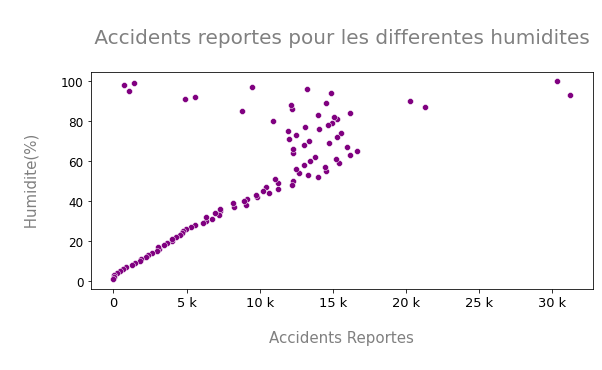

In [57]:
plt.figure(figsize=(9,4))
plt.title('\n Accidents reportes pour les differentes humidites \n', size=20, color='grey')
plt.ylabel('\n Humidite(%) \n', fontsize=15, color='grey')
plt.xlabel('\nAccidents Reportes\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=humid.Cases,y=humid.Humidity,color="purple")
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

Ici, constate qu'à mesure que l'humidité augmente, le nombre d'accident, aussi.

#### Étude des pressions atmosphériques
La pression atmosphérique est la pression qu'exerce le mélange gazeux constituant l'atmosphère considérée (sur Terre : de l'air) sur une surface quelconque en contact avec elle.
Source : https://fr.wikipedia.org/wiki/Pression_atmosphérique

In [58]:
pressure = pd.DataFrame(df["Pressure(in)"].value_counts()).reset_index().rename(columns={"index":"Pressure","Pressure(in)":"Cases"})

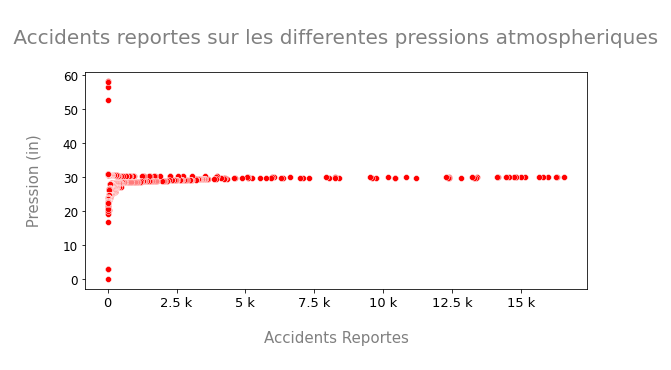

In [59]:
plt.figure(figsize=(9,4))
plt.title('\n Accidents reportes sur les differentes pressions atmospheriques \n', size=20, color='grey')
plt.ylabel('\n Pression (in) \n', fontsize=15, color='grey')
plt.xlabel('\nAccidents Reportes\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=pressure.Cases,y=pressure.Pressure,color="red")
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

Nous constatons qu'un grand nombre d'accident s'est produit lorsque la pression atmosphérique était entre 20 et 30(in).

#### Étude du refroidissement éolien
Le refroidissement éolien, parfois aussi appelé température ressentie, est la sensation de froid produite par le vent pour une température de l'air ambiant donnée.
Source : https://fr.wikipedia.org/wiki/Refroidissement_éolien

In [60]:
wind = pd.DataFrame(df["Wind_Chill(F)"].value_counts()).reset_index().rename(columns={"index":"Wind_Chill","Wind_Chill(F)":"Cases"})

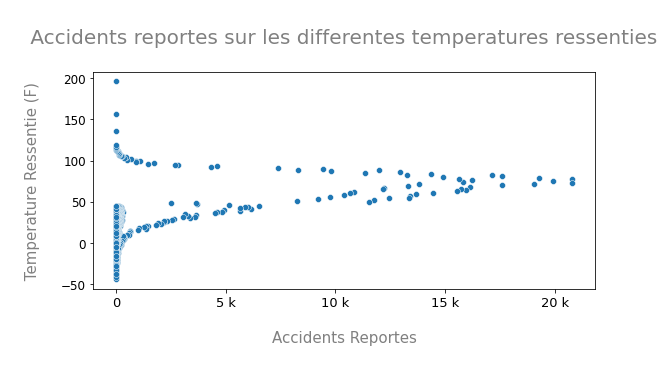

In [61]:
plt.figure(figsize=(9,4))
plt.title('\n Accidents reportes sur les differentes temperatures ressenties \n', size=20, color='grey')
plt.ylabel('\n Temperature Ressentie (F) \n', fontsize=15, color='grey')
plt.xlabel('\nAccidents Reportes\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=wind.Cases,y=wind.Wind_Chill)
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

Nous constatons qu'un grand nombre d'accident s'est produit lorsque la température ressentie était entre 50 et 90(F), soit entre 10 et ~32 degrés.

#### Étude de la vitesse du vent

In [62]:
wind = pd.DataFrame(df["Wind_Speed(mph)"].value_counts()).reset_index().rename(columns={"index":"Wind_Speed","Wind_Speed(mph)":"Cases"})

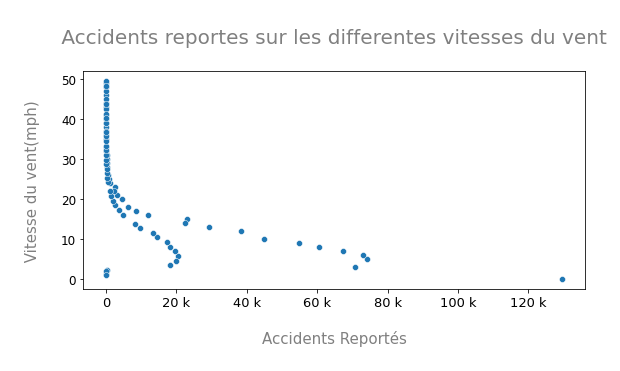

In [63]:
plt.figure(figsize=(9,4))
plt.title('\n Accidents reportes sur les differentes vitesses du vent \n', size=20, color='grey')
plt.ylabel('\n Vitesse du vent(mph) \n', fontsize=15, color='grey')
plt.xlabel('\nAccidents Reportés\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=wind.Cases,y=wind.Wind_Speed[wind.Wind_Speed<50])
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

Nous voyons que la grande majorité des accidents se sont produits lorsque la vitesse du vent était entre 5 et 10mph, soit entre ~8 et ~16km/h.
D'après le National Weather Service des Etats-Unis, la vitesse du vent devient dangereuse lorsqu'elle atteint 30-45mph pour les grands véhicules (camion) et 40-58mph pour les petits véhicules. 
Source : https://www.cmslaw.com/blog/2021/march/high-winds-can-pose-dangers-for-road-travel/
Autrement dit, la vitesse du vent ne semble pas avoir eu d'incidence sur les accidents repertoriés.

#### Étude de la distance de visibilité
La distance de visibilité est la distance à laquelle les véhicules sur une route doivent maintenir avec un obstacle ou un changement de direction de la route afin de pouvoir réagir à temps lors d'une manœuvre.
Source : https://fr.wikipedia.org/wiki/Distance_de_visibilité

In [64]:
visibility = pd.DataFrame(df["Visibility(mi)"].value_counts()).reset_index().rename(columns={"index":"Visibility","Visibility(mi)":"Cases"})

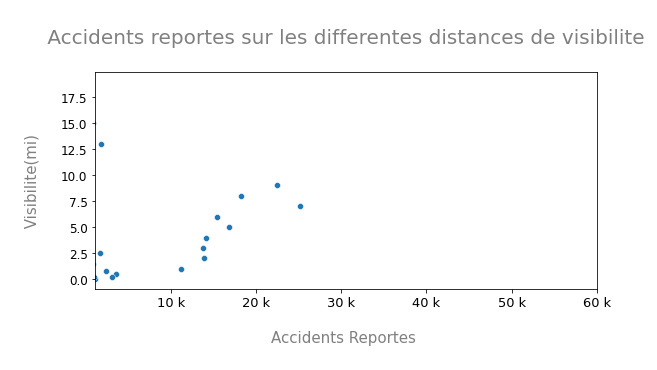

In [65]:
plt.figure(figsize=(9,4))
plt.title('\n Accidents reportes sur les differentes distances de visibilite \n', size=20, color='grey')
plt.ylabel('\n Visibilite(mi) \n', fontsize=15, color='grey')
plt.xlabel('\nAccidents Reportes \n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(1000,60000)
a = sns.scatterplot(x=visibility.Cases,y=visibility.Visibility[visibility.Visibility<20])
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

Ici, nous pouvons observer que dans la grande majorité des cas, les accidents ont eu lieu lorsqu'il y avait entre 1 et 10miles soit entre ~1 et ~16km.
D'après le code de la route, il est recommandé que la distance de visibilité minimale puisse être parcourue en 2 secondes pour limiter le risque d'accidents.
Source : https://www.assurance-prevention.fr/respecter-distances-securite.html
Autrement dit, concerant les résultats du dataset, les accidents ont eu lieu lorsque les chauffeurs avaient suffisamment de distance de visibilité. Cette dernière n'est donc pas une cause majeure des accidents.

#### Étude des conditions météo

In [66]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

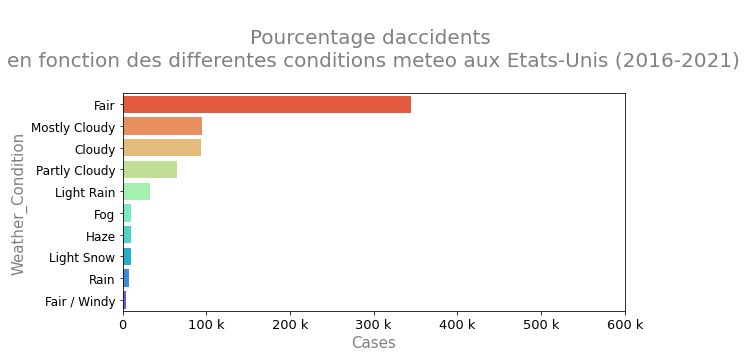

In [40]:
plt.figure(figsize=(9,4))
plt.title('\nPourcentage daccidents \nen fonction des differentes conditions meteo aux Etats-Unis (2016-2021)\n', size=20, color='grey')
plt.xlabel('\nAccidents Reportes\n', fontsize=15, color='grey')
plt.ylabel('\nCondition Meteo\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 600000)
a = sns.barplot(x=weather_condition_df['Cases'], y=weather_condition_df['Weather_Condition'], palette='rainbow_r')
a.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

Ici, nous pouvons constater que dans la grande majorité des cas, les accidents ont eu lieu lorsque les conditions meteo étaient bonnes. Les conditions météo ne semblent donc pas avoir été une cause majeure des accidents.

### Map
Étude avec Start_Lat et Start_Lng 

In [152]:
df.Start_Lat

ID
A-1         40.108910
A-2         39.865420
A-3         39.102660
A-4         41.062130
A-5         39.172393
              ...    
A-966286    30.273935
A-966287    41.244526
A-966288    33.987517
A-966289    39.813412
A-966290    26.097221
Name: Start_Lat, Length: 966290, dtype: float64

In [153]:
df.Start_Lng

ID
A-1         -83.092860
A-2         -84.062800
A-3         -84.524680
A-4         -81.537840
A-5         -84.492792
               ...    
A-966286    -81.716656
A-966287    -74.170265
A-966288   -117.891127
A-966289    -86.290987
A-966290    -80.240643
Name: Start_Lng, Length: 966290, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

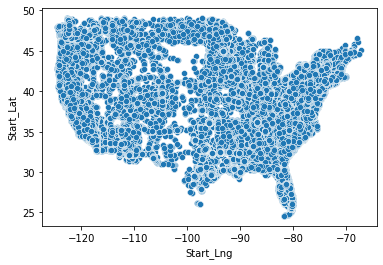

In [155]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

In [177]:
sample = df.sample(int(0.01*len(df)))
pairs_sample = list(zip(list(sample.Start_Lat), list(sample.Start_Lng)))

In [178]:
map = folium.Map()
HeatMap(pairs_sample).add_to(map)
map 

D'après la Heatmap, la majorité des accidents semble plus se concentrer sur les cotes Est ou Ouest du pays.
Alors que dans le centre, on observe beaucoup moins de cas repertoriés d'accidents.
A observer avec la population par état pour voir s'il y a un lien 

Liste des états de la cote Est : https://en.wikipedia.org/wiki/East_Coast_of_the_United_States

Liste des états de la cote Ouest : https://en.wikipedia.org/wiki/West_Coast_of_the_United_States

In [104]:
df2

,State,Population
City,,
New York,NY,8804190
Los Angeles,CA,3898747
Chicago,IL,2746388
Houston,TX,2304580
Phoenix,AZ,1608139
...,...,...
Hoot Owl,OK,0
Lakeside,MO,0
Mustang,TX,0


D'après data commons, la population des États-Unis est de 329.5 million habitants (2020).

La population cumulée de la côte Est et Ouest est de 171.712.049 habitants (2020), ce qui en fait les zones les plus peuplées du pays et expliquerait pourquoi les accidents y sont les plus reportés. 
Il y aurait donc un lien entre le nombre d'accidents reportés et la taille de la population (plus la population est grande, plus il est susceptible d'avoir un nombre d'accidents important).

Source : https://datacommons.org/place/country/USA?utm_medium=explore&mprop=count&popt=Person&hl=en

## MODEL 

### PCA 

In [11]:
def pca_auto (df, n_comp):
    X = df.select_dtypes(include=['float64','int64'])
    X=X.drop_duplicates()
    
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    
    #Centrage et rédution
    X_scaled = StandardScaler().fit_transform(X)
    
    #Instanciation du PCA
    pca = PCA(n_comp).fit(X_scaled) #calcule PCA1,2, etc
    
    X_projected = pca.transform(X_scaled)
    
    #Principal components coefficients (depending on original features)
    df_pca = pd.DataFrame(pca.components_, 
                          index=['PC'+str(i+1) for i in range(n_comp)],
                         columns=X.columns).T
    
    #Plotting correlation coefficient X_projected
    import seaborn as sns
    heatmap = sns.heatmap(pd.DataFrame(X_projected).corr(), annot=True, fmt = '.3f',cmap='coolwarm')
    heatmap.set_title("Principal components coefficients", fontdict={'fontsize':18}, pad=16)
    plt.show()
    
    infopca=pd.DataFrame()
    infopca['Variables']=['PC'+str(i+1) for i in range(n_comp)]
    infopca['importance']=pca.explained_variance_ratio_*100
    infopca.plot(kind='bar')
    plt.show()
    
    #On regarde les correlationns entre les variables PCA et celles de depart
    #Plotting correlation coefficient X_projected
    import seaborn as sns
    heatmap = sns.heatmap(pd.DataFrame(X_projected).corr(), annot=True, fmt = '.3f',cmap='coolwarm')
    heatmap.set_title("Principal components coefficients", fontdict={'fontsize':18}, pad=16)
    plt.show()
    
    #Variances expliquées
    important_degres = pca.explained_variance_ratio_*100
    
    #Projection de l'éboulis des valeurs propres
    plt.figure(figsize=(12,8))
    plt.bar(np.arange(len(important_degres))+1, important_degres)
    plt.plot(np.arange(len(important_degres))+1, important_degres.cumsum(), c='red',marker='o')
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

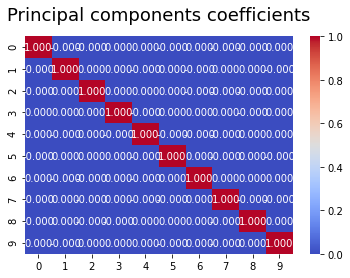

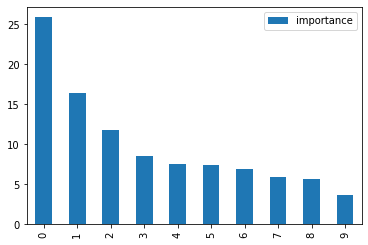

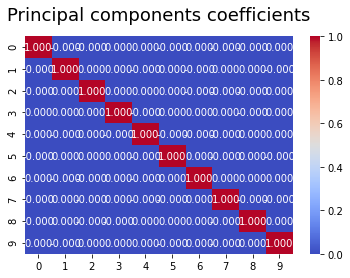

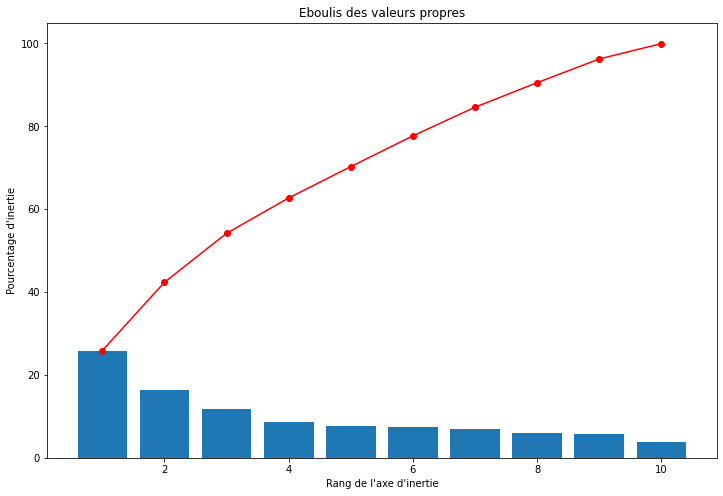

In [14]:
pca_auto(df,10)

On peut prendre les 9 premières composantes principales car elles expliquent le dataset à plus de 90%

### Clustering
La sélection du nombre de cluster OPTIMAL sera faite avec les methodes silouette et elbow.

In [69]:
X=df.select_dtypes(include=['float64','int64'])
X_sc = StandardScaler().fit_transform(X)
pca = PCA(n_components=10).fit(X_sc)
# Projecting X on principal components
X_pca = pca.transform(X_sc)

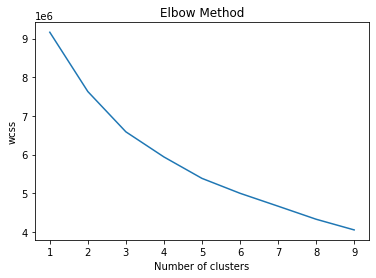

In [18]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
n=10
wcss = []
for i in range(1,n):
    km=KMeans(n_clusters=i)
    km.fit(X_pca)
    wcss.append(km.inertia_)
plt.plot(range(1,n),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#le nombre de cluster optimal = 5

In [21]:
#pip install yellowbrick

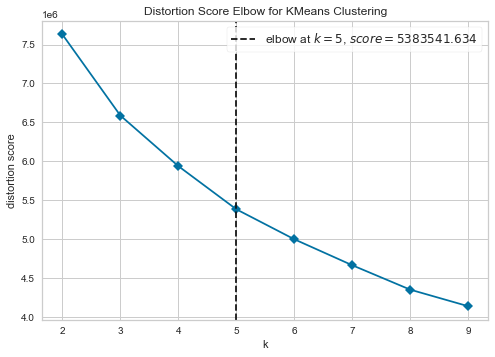

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#D'apres la methode elbow, le nombre de cluster optimal = 5 

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = SilhouetteVisualizer(model, k=(1,10))

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#D'apres les methodes elbow et silouette, nous pouvons decider de prendre un nombre de clusters de 3
#Cependant pour mieux detailler les propositions de segmentation, il faudra peut etre en considerer 5 (
    #avantages:permet de mieux comprendre certains details
    #inconvenients: y'a trop de details, certains clusters se resemblent)

<AxesSubplot:ylabel='cluster'>

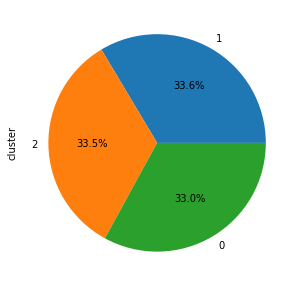

In [73]:
## KMeans Clustering with 3
from sklearn.cluster import KMeans
n_clusters=3
X['cluster'] = KMeans(n_clusters).fit(X_pca).labels_
fig, ax = plt.subplots(figsize=(5,5))
X.cluster.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [74]:
X.groupby("cluster").mean()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
cluster,,,,,,,,,,,,,
0,2.017738,37.188039,-118.339980,37.188215,-118.339340,0.917095,63.231935,62.564410,58.119799,28.921675,8.794095,6.566112,0.003875
1,2.095346,39.610692,-81.095035,39.611057,-81.094733,0.946620,56.784091,55.192523,66.601096,29.452122,8.977752,7.148348,0.007640
2,2.012357,29.777529,-84.568526,29.777553,-84.568417,0.588018,77.829719,77.821886,67.357239,29.824985,9.586646,7.749386,0.007538


In [75]:
X.groupby("cluster").mean()/X.mean()

,Distance(mi),End_Lat,End_Lng,Humidity(%),Precipitation(in),Pressure(in),Severity,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Wind_Chill(F),Wind_Speed(mph),cluster
cluster,,,,,,,,,,,,,,
0,1.122733,1.046949,1.251818,0.907290,0.608829,0.983660,0.988127,1.046949,1.251820,0.958718,0.964154,0.959608,0.917357,NaN
1,1.158878,1.115158,0.857837,1.039689,1.200301,1.001701,1.026133,1.115154,0.857837,0.860956,0.984289,0.846539,0.998702,NaN
2,0.719868,0.838319,0.894582,1.051493,1.184340,1.014383,0.985491,0.838322,0.894580,1.180049,1.051046,1.193626,1.082673,NaN


In [78]:
info=(X.groupby("cluster").mean()/X.mean())

<AxesSubplot:title={'center':'Cy'}, ylabel='cluster'>

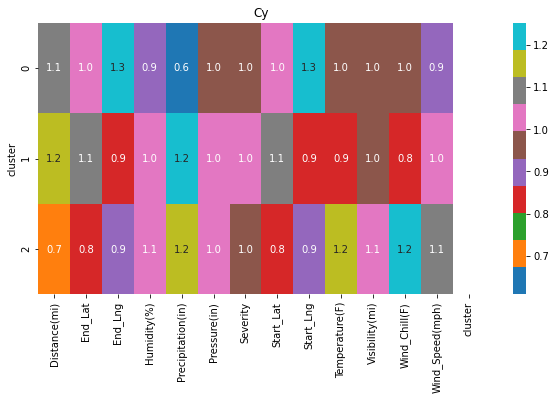

In [79]:
cmap = sns.diverging_palette(150, 5, as_cmap=True)

#Heatmap of 
from matplotlib import rcParams
plt.title('Cy')
rcParams['figure.figsize'] = (10, 5)
sns.heatmap(info, annot=True,cmap=sns.color_palette("tab10"),square=False, fmt='.1f')

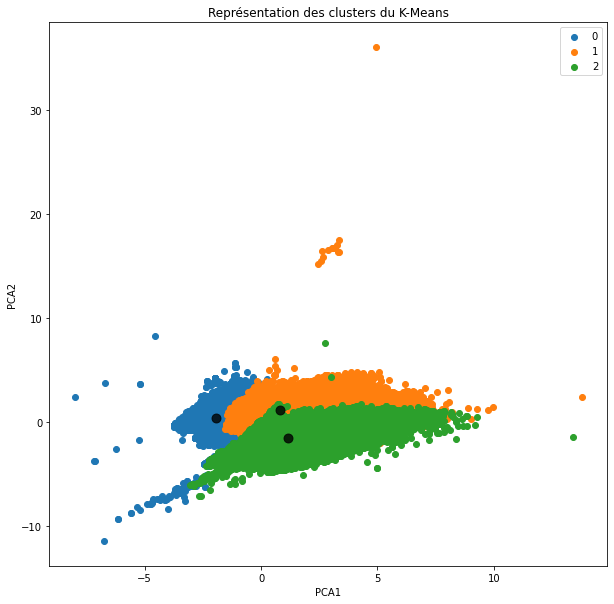

In [80]:
#https://analyticsinsights.io/le-clustering-definition-et-implementations/
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3) # on veut diviser le dataset en 3 clusters

#Prédiction
label = km.fit_predict(X_pca)
X["cluster"]=label
centroids = km.cluster_centers_
u_labels = np.unique(label)
#df['classe']=u_labels
#après on fait un group_by()

#Représentation graphique:

plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig("representation_kmeans.png")
plt.show()

### Détection d'anomalies avec isolation-forest

In [81]:
#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py
#détection d'anomalies pour la détection des valeurs aberrantes sur les jeux de données
#https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2#specify the 12 metrics column names to be modelled
#
from sklearn.ensemble import IsolationForest
data=X.drop(columns="cluster")
#data.head()
data['anomaly'] = IsolationForest(contamination=0.01).fit(data).predict(data)
#ici je demande au modele d'IA (isolation forest) qui trouve les 5% des diamonds qui sont tres extremes

#Find the number of anomalies and normal points here points classified -1 are anomalous
data['anomaly'].value_counts()

 1    698132
-1      7052
Name: anomaly, dtype: int64

In [91]:
outliers=data.loc[data['anomaly']==-1]
outliers=outliers.drop(columns="anomaly")
outliers.to_csv('US_accidents_outliers.csv')

In [83]:
data.groupby("anomaly").mean()/data.mean()

,Distance(mi),End_Lat,End_Lng,Humidity(%),Precipitation(in),Pressure(in),Severity,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Wind_Chill(F),Wind_Speed(mph),anomaly
anomaly,,,,,,,,,,,,,,
-1,4.981064,1.188741,1.091005,1.275729,11.670683,0.924399,1.281730,1.188714,1.091025,0.516397,0.409025,0.406991,1.811556,NaN
1,0.959786,0.998093,0.999081,0.997215,0.892213,1.000764,0.997154,0.998094,0.999081,1.004885,1.005970,1.005990,0.991802,NaN


In [92]:
data_without_outliers=data.loc[data['anomaly']==1]
data_without_outliers=data_without_outliers.drop(columns="anomaly")
data_without_outliers.to_csv("US_accidents_without_anomalies.csv")

In [90]:
data_without_outliers.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
ID,,,,,,,,,,,,,
A-1,3,40.108910,-83.092860,40.112060,-83.031870,3.230,42.1,36.1,58.0,29.76,10.0,10.4,0.00
A-5,3,39.172393,-84.492792,39.170476,-84.501798,0.500,37.0,29.8,93.0,29.69,10.0,10.4,0.01
A-8,2,41.375310,-81.820170,41.367860,-81.821740,0.521,33.1,30.0,92.0,29.63,0.5,3.5,0.08
A-10,2,40.109310,-82.968490,40.110780,-82.984000,0.826,32.0,28.7,100.0,29.59,0.5,3.5,0.05
A-11,2,39.192880,-84.477230,39.196150,-84.473350,0.307,33.8,29.6,100.0,29.66,3.0,4.6,0.03


In [99]:
def reporting(df):
#https://github.com/pandas-profiling/pandas-profiling
#Complete Automated Exploratory Data Analysis 
#https://www.datacorner.fr/pandas-profiling/

    from pandas_profiling import ProfileReport
    resultats = df.profile_report(title='Pandas Profiling Report of US Accidents 2016-2021 Cleaned')#cleaned = df nettoye et sans outliers
    resultats.to_file("report.html")
    return None
#reporting(data_without_outliers)



## SUMMARY AND CONCLUSION

En sommes, l'objectif de ce projet était de déceler les possibles causes des accidents, leurs tendances et d’identifier les villes ou zones les plus à risque aux États-Unis.
Il en ressort ainsi que :

- La grande majorité des accidents a eu une sévérité sensiblement estimée à 2, donc le traffic n'a pas été grandement impacté par les accidents, la majorité du temps.

- La longueur de la route affectée par les accidents est en moyenne de 0.8 miles(Distance(mi)). Il n'y avait donc presque pas de trouble du traffic

- Les accidents ont eu lieu dans des conditons où les chauffeurs avaient en moyenne 9 miles de visibilité(Visibility(mi)). Donc le manque de visibilité ne peut être considéré commme cause des accidents.

- Pour la grande majorité des accidents, aucunes précipitations n'ont été reportées(Precipitation(in)). La pluie n'aurait donc pas été une cause des accidents.

- Plus de 5000 données manquantes dans Number, soit près de 60% de données manquantes. Compte tenu de l'importance que pourrait avoir les informations transmises dans le cadre de l'étude des accidents, nous avons décidé de tout simplement les supprimer.

- Sur les 6 villes les plus accidentées:
    * 4 sont des villes uniques et font partie des 20 villes les plus peuplées du pays.
    * Tandis que les 2 dernières font parties du classement car plusieurs villes portent le même nom et leurs résultats ont été additionnés.
    * À Miami (total des 5 villes) 7090 accidents en moyenne ont été repertoriés par an sur la période de 2016-2021
    Nous pouvons donc penser à travers ces résultats que le taux d'accident semble lié à la taille de la population. Cependant, il est étrange que New York, la ville la plus peuplée, n'ait pas repertorié plus de 10k accidents sur la période étudiée.

- Le nombre d'accident par ville décroit de manière exponentielle.

- 4913 villes ont repertorié entre 1 et 10 accidents.

- ~6% des états ont reportés plus de 50.000 accidents, la Californie étant l'état le plus touché, ~42% des états ont reportés moins de 5000 accidents et ~51% des états du dataset ayant reporté entre 5000 et 50000 accidents.

- Sur la période de 2016-2021, la rue I-95 N a été celle qui a reporté le plus d'accidents dans le pays (14k).

- La grande majorité des accidents prend place durant les jours ouvrables (surtout le vendredi)et principalement en journée (entre 6 et 18h, heure où le pourcentage d'accident est le plus élevé). Ce qui correspond aux heures où les habitants vont et rentrent pressément du travail de manière générale.

- Les accidents se produisent beaucoup moins durant les week-ends et la distribution par heure des accidents le week-end, est différente de celle des jours ouvrables :
    * Le week-end, les accidents prennent place le plus souvent entre 10h et 20h ainsi qu'entre minuit et 3h.
    * Contrairement aux jours ouvrables où, les accident se produisent le plus entre 5h et 9h et aussi entre 14h et 18h.

- Octobre, Novembre, Décembre sont les mois ayant le plus d'accidents repertoriés, avec le pic d'accident ayant lieu durant le mois de Décembre. Cependant, les données repertoriées dans ce dataset étant mises en place sur la période de février 2016 à décembre 2021, il manquait donc des informations concernant les accidents ayant eu lieu en janvier 2016. Le tout, sans oublier le manque considérable de données sur les années 2018-19-20.

- La tendance des accidents repertoriés semble croissante. Peut-être la collecte de données sur les accidents aurait été plus efficace au fil des ans et/ou il y aurait eu plus d'accidents. (Nous ne sommes pas en mesure d'y répondre).

- Quasiment 100% des accidents reportés ont eu lieu sur des routes n'ayant pas de bosses.
- 6.81% des accidents reportés ont eu lieu à un croisement.
- Quasiment 100% des accidents reportés ont eu lieu sur des routes n'ayant pas de panneau ‘cédez le passage’.
- 9.90% des accidents reportés ont eu lieu à une intersection.
- 1.79% des accidents reportés ont eu lieu sur des routes ayant un panneau 'stop'.
- 0.16% des accidents reportés ont eu lieu sur des routes sans issue.
- 7.80% des accidents reportés ont eu lieu en présence de signalisation routière.
- Aucun accident n'a été reporté sur les ronds points.

- Le maximum d'accident reporté a eu lieu lorsque la température était entre 60 et 80F soit, entre ~15C et 26C. La température n'a donc pas influé sur les accidents.

- A mesure que l'humidité augmente, le nombre d'accident, aussi.

- Un grand nombre d'accident s'est produit lorsque la pression atmosphérique était entre 20 et 30(in). Donc pas assez pour être une cause majeure dans les accidents.

- Un grand nombre d'accident s'est produit lorsque la température ressentie était entre 50 et 90(F), soit entre 10 et ~32 degrés. Donc pas assez pour être une cause majeure dans les accidents.

- La grande majorité des accidents se sont produits lorsque la vitesse du vent était entre 5 et 10mph, soit entre ~8 et ~16km/h. Autrement dit, la vitesse du vent ne semble pas avoir eu d'incidence sur les accidents repertoriés.

- La grande majorité des cas, les accidents ont eu lieu lorsqu'il y avait entre 1 et 10miles soit entre ~1 et ~16km. Autrement dit, les accidents ont eu lieu lorsque les chauffeurs avaient suffisamment de distance de visibilité.

- Dans la grande majorité des cas, les accidents ont eu lieu lorsque les conditions meteo étaient bonnes. Les conditions météo ne semblent donc pas avoir été une cause majeure des accidents.

- La majorité des accidents semble plus se concentrer sur les cotes Est ou Ouest du pays. Alors que dans le centre, on observe beaucoup moins de cas repertoriés d'accidents.

Nous avons également rencontrés des difficultés notamment : 
- Dûes à la grande taille du dataset (plus de 2 millions d'éléments), les temps de calculs étant parfois très longs notemment durant les calculs de clusters.
- Des problèmes de compilation de la fonction reporting sur le dataset, renvoyant l'erreur suivante que nous n'avons pas su régler car nous ne comprîmes pas clairement l'erreur :
    IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
    Nous pouvons cependant attester que cette fonction marche car nous l'avons utilisé sur des datasets plus petits sans encombres.
    
Étant donné qu'un travail est toujours perfectible, nous avons pensé à des pistes possibles pour améliorer le Notebook.
Améliorations futures :
- Réalisation d'un modèle de prédiction d'accidents avec Tensorflow afin de permettre aux autorités de prendre des mesures à l'avance et donc d'aider à réduire le taux d'accidents. 
    Piste possible : https://towardsdatascience.com/step-by-step-guide-building-a-prediction-model-in-python-ac441e8b9e8b
    
- Trouver comment assigner les niveaux de couleurs au gradient de la HeatMap pour mieux identifier les zones dangereuses sur une carte, avec des niveau de couleur comme suit : 
    #Rouge = villes 20k+ accidents | Jaune = entre 10k et 20k accidents, 
    #Vert = entre 1k et 10k accidents | Bleu = -1k accidents.
    #A faire avec un logarithmic_scale parce que les accidents suivent une courbe logarithmique/exponentielle.
    #Piste possible : https://www.biostars.org/p/9461044/

## SOURCES / ACKNOWLEDGMENT 

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

## ABBREVIATIONS EXPLAINED
Dataset abbrevations:¶
* ID - This is a unique identifier of the accident record.
* Severity - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
* Start_Time - Shows start time of the accident in local time zone.
* End_Time - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow
* Start_Lat - Shows latitude in GPS coordinate of the start point.
* Start_Lng - Shows longitude in GPS coordinate of the start point.
* End_Lat - Shows latitude in GPS coordinate of the end point.
* End_Lng - Shows longitude in GPS coordinate of the end point.
* Distance(mi) - The length of the road extent affected by the accident.
* Description - Shows natural language description of the accident.
* Number - Shows the street number in address record.
* Street - Shows the street name in address record.
* Side - Shows the relative side of the street (Right/Left) in address record.
* City - Shows the city in address record.
* County - Shows the county in address record.
* State - Shows the state in address record.
* Zipcode - Shows the zipcode in address record.
* Country - Shows the country in address record.
* Timezone - Shows timezone based on the location of the accident (eastern, central, etc.).
* Airport_Code - Denotes an airport-based weather station which is the closest one to location of the accident.
* Weather_Timestamp - Shows the time-stamp of weather observation record (in local time).
* Temperature(F) - Shows the temperature (in Fahrenheit).
* Wind_Chill(F) - Shows the wind chill (in Fahrenheit).
* Humidity(%) - Shows the humidity (in percentage).
* Pressure(in) - Shows the air pressure (in inches).
* Visibility(mi) - Shows visibility (in miles).
* Wind_Direction - Shows wind direction.
* Wind_Speed(mph) - Shows wind speed (in miles per hour).
* Precipitation(in) - Shows precipitation amount in inches, if there is any.
* Weather_Condition - Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
* Amenity - A POI annotation which indicates presence of amenity in a nearby location.
* Bump - A POI annotation which indicates presence of speed bump or hump in a nearby location.
* Crossing - A POI annotation which indicates presence of crossing in a nearby location.
* Give_Way - A POI annotation which indicates presence of give_way in a nearby location.
* Junction - A POI annotation which indicates presence of junction in a nearby location.
* No_Exit - A POI annotation which indicates presence of junction in a nearby location.
* Railway - A POI annotation which indicates presence of railway in a nearby location.
* Roundabout - A POI annotation which indicates presence of roundabout in a nearby location.
* Station - A POI annotation which indicates presence of station in a nearby location.
* Stop - A POI annotation which indicates presence of stop in a nearby location.
* Traffic_Calming - A POI annotation which indicates presence of traffic_calming in a nearby location.
* Traffic_Signal - A POI annotation which indicates presence of traffic_signal in a nearby location.
* Turning_Loop - A POI annotation which indicates presence of turning_loop in a nearby location.
* Sunrise_Sunset - Shows the period of day (i.e. day or night) based on sunrise/sunset.
* Civil_Twilight - Shows the period of day (i.e. day or night) based on civil twilight.
* Nautical_Twilight - Shows the period of day (i.e. day or night) based on nautical twilight.
* Astronomical_Twilight - Shows the period of day (i.e. day or night) based on astronomical twilight.
* Abbreviation for states : https://about.usps.com/who-we-are/postal-history/state-abbreviations.htm